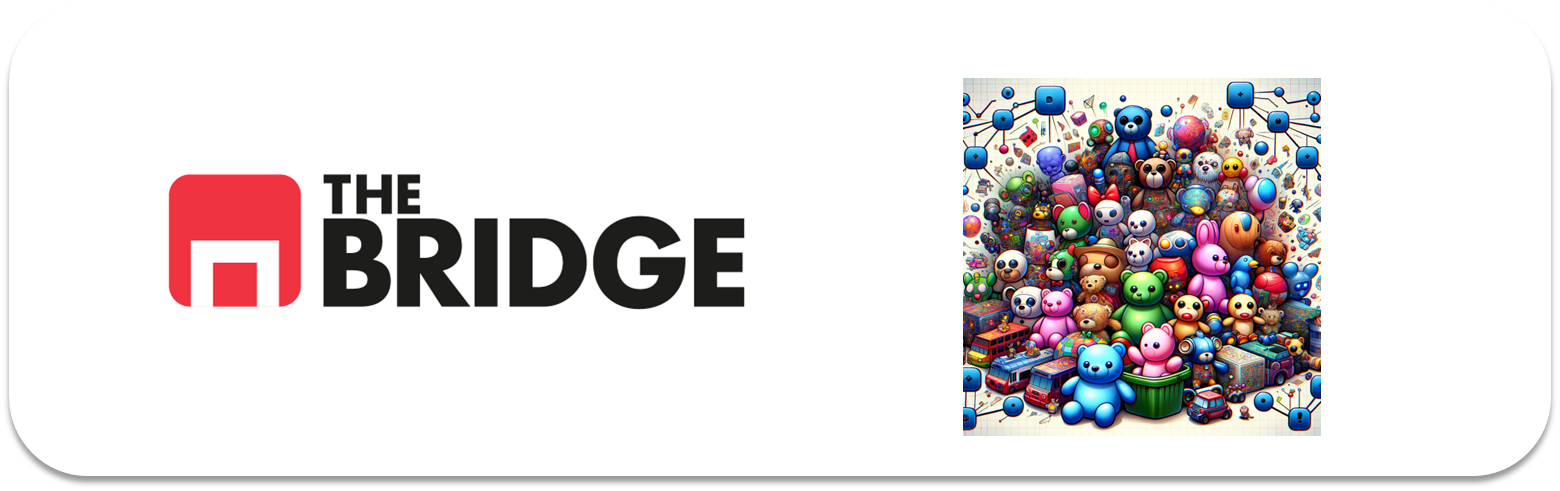

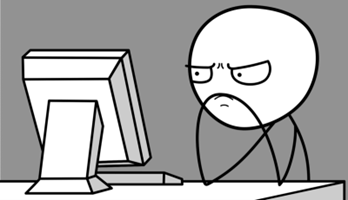

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [353]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
import funciones_ML as bt
from sklearn.datasets import fetch_olivetti_faces
import scipy.io
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV, RandomizedSearchCV,cross_val_score
from skimage.transform import resize
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [205]:
#con scipy descargandomelo a mi pc
olivet_scipy= scipy.io.loadmat(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SPRINT_15_NO_SUPERVISADOS_CLUSTERING\UNIT_1\TRABAJO_OBL\data\olivettifaces.mat")

In [206]:
oli=fetch_olivetti_faces()

In [207]:
data=oli.data
target= oli.target

In [208]:
#descripcion
descripcion = oli.DESCR
#print(descripcion)

TRADUCCION:

El conjunto de datos de caras de Olivetti
--------------------------

«Este conjunto de datos contiene un conjunto de imágenes de rostros» tomadas entre abril de 1992 y 1992.
Abril de 1994 en AT&T Laboratories Cambridge. El
:func:'sklearn.datasets.fetch_olivetti_faces' es la función
función de búsqueda / almacenamiento en caché que descarga los datos
archivo de AT&T.

.. _This conjunto de datos contiene un conjunto de imágenes faciales: https://cam-orl.co.uk/facedatabase.html

Como se describe en el sitio web original:
Hay diez imágenes diferentes de cada uno de los 40 sujetos distintos. Para algunos
    sujetos, las imágenes fueron tomadas en diferentes momentos, variando la iluminación,
    expresiones faciales (ojos abiertos/cerrados, sonriente/no sonriente) y faciales
    Detalles (gafas / sin gafas). Todas las imágenes fueron tomadas en un contexto oscuro
    fondo homogéneo con los sujetos en posición vertical y frontal
    (con tolerancia para algunos movimientos laterales).

**Data Set Characteristics:**

=================   =====================<BR>
Classes                                40<BR>
Samples total                         400<BR>
Dimensionality                       4096<BR>
Features            real, between 0 and 1<BR>
=================   =====================

La imagen se cuantifica a 256 niveles de gris y se almacena como 8 bits sin signo
Enteros; El cargador los convertirá en valores de coma flotante en el
interval [0, 1], con los que es más fácil trabajar para muchos algoritmos.

El "objetivo" de esta base de datos es un número entero de 0 a 39 que indica el
identidad de la persona fotografiada; Sin embargo, con solo 10 ejemplos por clase, este
un conjunto de datos relativamente pequeño es más interesante desde un punto de vista no supervisado o
perspectiva semi-supervisada.

El conjunto de datos original consistía en 92 x 112, mientras que la versión disponible aquí
consta de 64x64 imágenes.

Al usar estas imágenes, por favor dé crédito a AT&T Laboratories Cambridge.


In [209]:
print("Las muestras y la dimension de los datos son", data.shape)# imagenes en arrays
print("El total de muestras es", target.shape)# seran las etiquetas 
print("El Número de individuos es :", len(set(oli.target)))# numero individuos

Las muestras y la dimension de los datos son (400, 4096)
El total de muestras es (400,)
El Número de individuos es : 40


### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [210]:
target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [211]:
df_target=pd.DataFrame(target)


In [212]:
bt.obtener_estadisticas(df_target)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
0,10.0,int32,19.5,No,11.56,133.58,9.75,19.5,29.25,numerica continua,0.0


In [213]:
data

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [214]:
df_data_ord=pd.DataFrame(data)


In [215]:
df_data_ord

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.388430,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.380165,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.194215,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.446281,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306


In [216]:
# reordeno aleatoriamente el 100$ de las muestras, elimino el indexado que tenia, y que la columna que estaba indexando pase a ser columna, aplicando un randon_state 
df_data_random=df_data_ord.sample(frac=1, random_state=42).reset_index(drop=True)

In [217]:
df_data_random

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.198347,0.235537,0.351240,0.409091,0.421488,0.429752,0.500000,0.528926,0.524793,0.553719,...,0.528926,0.508264,0.524793,0.504132,0.483471,0.471074,0.285124,0.061983,0.128099,0.090909
1,0.185950,0.128099,0.115702,0.132231,0.185950,0.268595,0.433884,0.541322,0.570248,0.586777,...,0.400826,0.396694,0.409091,0.301653,0.421488,0.462810,0.247934,0.190083,0.210744,0.210744
2,0.508264,0.603306,0.619835,0.628099,0.657025,0.665289,0.690083,0.727273,0.743802,0.768595,...,0.438017,0.301653,0.305785,0.314050,0.326446,0.338843,0.330579,0.334711,0.342975,0.342975
3,0.136364,0.140496,0.185950,0.280992,0.318182,0.363636,0.409091,0.417355,0.438017,0.454545,...,0.198347,0.169421,0.206612,0.276859,0.355372,0.685950,0.661157,0.280992,0.371901,0.276859
4,0.652893,0.644628,0.652893,0.706612,0.714876,0.719008,0.743802,0.747934,0.747934,0.756198,...,0.061983,0.074380,0.074380,0.082645,0.082645,0.111570,0.070248,0.086777,0.185950,0.231405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.194215,0.223140,0.314050,0.500000,0.636364,0.735537,0.797521,0.826446,0.847107,0.847107,...,0.210744,0.206612,0.181818,0.165289,0.123967,0.123967,0.128099,0.136364,0.169421,0.165289
396,0.260331,0.355372,0.648760,0.822314,0.838843,0.834711,0.830579,0.826446,0.822314,0.814050,...,0.330579,0.264463,0.185950,0.136364,0.177686,0.132231,0.103306,0.103306,0.107438,0.119835
397,0.611570,0.644628,0.657025,0.669421,0.673554,0.710744,0.735537,0.756198,0.760331,0.768595,...,0.198347,0.152893,0.107438,0.119835,0.132231,0.111570,0.136364,0.177686,0.210744,0.223140
398,0.285124,0.293388,0.297521,0.293388,0.219008,0.107438,0.342975,0.508264,0.533058,0.557851,...,0.359504,0.388430,0.442149,0.475207,0.500000,0.516529,0.520661,0.533058,0.533058,0.537190


### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [218]:
X=df_data_random

In [219]:
# me aseguro tener un 80% de train y 20% test que queda oara probar el modelo
X_train_80, X_test_20=train_test_split(X, test_size=0.2, random_state=42)


In [220]:
print(X_train_80.shape)
print(X_test_20.shape)


(320, 4096)
(80, 4096)


In [221]:
X_train_90, Xtrain_10=train_test_split(X_train_80, test_size=0.1, random_state=42)


In [222]:
print(X_train_90.shape)
print(Xtrain_10.shape)


(288, 4096)
(32, 4096)


In [223]:
X_train_89, Xtrain_11=train_test_split(X_train_80, test_size=0.11, random_state=42)



In [224]:
print(X_train_89.shape)
print(Xtrain_11.shape)

(284, 4096)
(36, 4096)


### #1.4

Crea los pares X,y para train, validation y test.

In [225]:
# conjunto 80% trainb y 20 para jugar

X_train, X_juego= train_test_split(X, test_size=0.2, random_state=42)

In [226]:
# conjunto del 50% del 20% anterior, consiguiendo un 10% y un 10%

X_test, X_val=train_test_split(X_juego, test_size=0.50, random_state=42)

Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [227]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

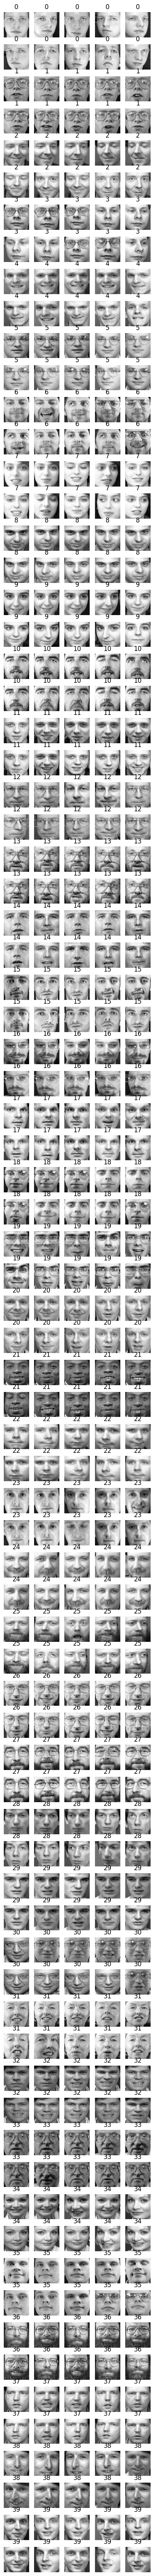

In [228]:
plot_faces(data, target, n_cols=5)

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [229]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

pca.n_components_

222

In [230]:
print(X_train_pca.shape, X_valid_pca.shape, X_test_pca.shape)

(320, 222) (40, 222) (40, 222)


### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

In [231]:

# rango de valores de k (de 5 a 150, con incrementos de 5)
k_values = range(5, 151, 5)

# variables para almacenar el mejor valor de k y la puntuación de silueta correspondiente
best_k = 0
best_silhouette_score = -1

# Iterar sobre los valores de k
for k in k_values:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    #print(kmeans.labels_)
    
    # Calculo la puntuación de silueta para el modelo actual
    silueta_point = silhouette_score(X_train_pca, kmeans.labels_)
    
    # Actualizo el mejor valor de k si se encuentra una puntuación de silueta mejor
    if silueta_point > best_silhouette_score:
        best_k = k
        best_silhouette_score = silueta_point
# gana el est_silhouette_score por decimas
print("The best k:", best_k)
print("silueta_point:", best_silhouette_score)


The best k: 105
silueta_point: 0.21670166


In [232]:
#print(kmeans.labels_)
best_silhouette_score
silueta_point

0.1959155

### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

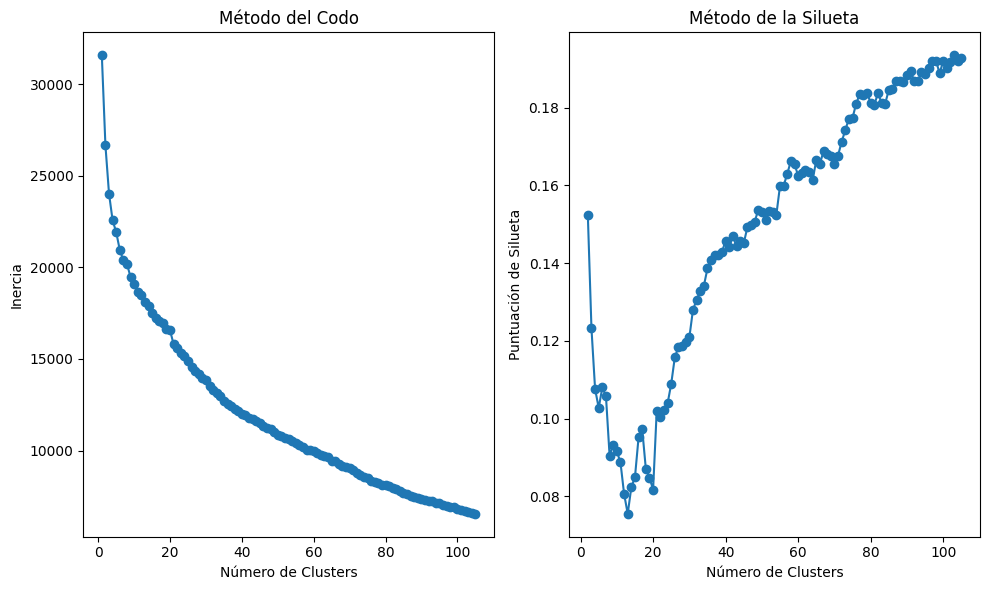

In [233]:
bt.encontrar_n_clusters(df_data_random, max_clusters=105)

no hay codo, pero termina la curva en 105 mas o menos como se pued ever y la punticion de silueta mas cercana a uno es 0.21 mas o menos, comos e obsewrva en el grafico

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [234]:
best_model= KMeans(n_clusters=105, n_init=10, max_iter=300, random_state=42)

In [235]:
best_silhouette_score

0.21670166

In [236]:
best_k


105

In [237]:
best_silhouette_score

0.21670166

In [251]:
best_model.inertia_

4295.576171875

In [301]:
len(best_model.labels_)

320

El modelo aplicado es el mas optimo

### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

In [238]:

# Obtener las etiquetas predichas poara el modelo best_model( centroides y clusters)
best_labels = best_model.fit_predict(X_train_pca)# al X_train_pca el cual fue redicido la dimensionalidad

# Itero sobre los cluster en un rango de 10
for clusters in range(10):
    imagen_cluster = X_train_pca[best_labels==clusters]# filtro x_train_pca donde "best:model" es igual al iterador
   


In [239]:
# Redimensiono las imágenes al tamaño esperado , que son 64x64 píxeles, isando la libreria scikit-image
imagenes_redimensionadas = [resize(imagen, (64, 64)) for imagen in imagen_cluster]

faces_array = np.array(imagenes_redimensionadas)


In [240]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

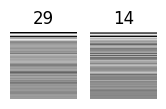

In [241]:
plot_faces(faces_array, best_labels, n_cols=5)

## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [242]:
X_train_pca
len(X_train_pca)

320

In [310]:

# como no tengo Etiquetas para un modleo no supervisado creo etiquetas ficticias aleatorias con semilla en 42 
#para  cada punto de los puntos(320 como datos hay en X_train_pca)
np.random.seed(42)
y_train_pseudo = np.random.randint(0, 320, len(X_train_pca))

# Entrenar Random Forest como un algoritmo de agrupamiento con las etiquetas ficticias creadad
rf_cluster = RandomForestClassifier(n_estimators=150, random_state=42)
rf_cluster.fit(X_train_pca, y_train_pseudo)

# Asignar clusters a los datos de prueba
y_pred_labels = rf_cluster.predict(X_test_pca)

# Evaluar la calidad de los clusters utilizando la métrica de silueta
silhouette_avg = silhouette_score(X_test_pca, y_pred_labels)
print("Puntuación de silueta:", silhouette_avg)
print("Número de clusters:", len(set(y_pred_labels)))
print("Número de datos:", len(y_pred_labels))



Puntuación de silueta: -0.18427825683849242
Número de clusters: 112
Número de datos: 200


segun la puntuacion e silueta los puntos esta muy cierca del limite de decision entre 2 grupos, ya que esta muy cercano al cero

### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [311]:
len(best_model.labels_)

320

In [312]:
len(df_data_random)

400

In [317]:
# Generar un conjunto de datos de clasificacion sintentico con 2 clases entre 0 y 1 y 320 features equivalentes a las labels del bestmodel y 400 muestras del total del dataframe
X, y = make_classification(n_samples=400, n_features=320, n_classes=2, random_state=42)

In [355]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train_2.shape)
print(y_train_2.shape)
print(X_train.shape)
print(X_test.shape)


(320, 320)
(320,)
(320, 320)
(80, 320)


In [367]:
# Reducción de dimensionalidad con PCA con ejercio anterior y se lo aplico a todos los datos de las features
pca = PCA(0.99) 
X_train_pca = pca.fit_transform(X_train_2)
X_test_pca = pca.transform(X_test_2)

# Ajustar el modelo K-Means a los datos PCA reducidos con el clusteres del ejerccio anterior
kmeans = KMeans(n_clusters=112, random_state=42)

print(len(X_train_pca))
print(len(X_test_pca))
kmeans

320
80


KMeans(n_clusters=112, random_state=42)

In [370]:
#encuentro loscentrides
find_centrides = kmeans.fit(X_train_pca)

#devuelve etiquetas de centroides
labels_centroides=kmeans.predict(X_train_pca)


# Calcula las distancias a los centroides para entrenamiento y prieba de features
centroid_distances_train = kmeans.transform(X_train_pca)
centroid_distances_test = kmeans.transform(X_test_pca)

#print(find_centrides)
#print(labels_centroides)
print(centroid_distances_train)
print(centroid_distances_test)


[[26.66850801 20.05976826 18.91788824 ... 27.77178013 25.13343992
  25.08514136]
 [25.37068944 20.1939559  18.35437777 ... 26.17464711 26.5243546
  25.83594056]
 [26.88920075 21.1363172  18.4071299  ... 26.98634232 24.95827681
  25.58928664]
 ...
 [25.65179662 21.82590445 19.18530448 ... 24.29329612 27.0315843
  24.88078534]
 [26.9928024  20.56761798 18.57378559 ... 25.38041849 24.81155956
  24.87742219]
 [25.13739663 18.70799316 17.23505462 ... 25.08383616 24.56077815
  24.30445078]]
[[26.33130471 19.29532777 17.06177703 ... 25.97873555 24.85919406
  24.29405366]
 [25.22945433 18.41431028 17.22991697 ... 24.14475468 23.11382847
  23.95812323]
 [24.75421026 18.78370779 16.58217403 ... 23.80981315 24.29786455
  21.97287458]
 ...
 [26.34444101 19.76083373 16.88376645 ... 26.70195477 25.16103328
  24.52742878]
 [24.93748274 18.61676133 15.53220337 ... 24.5972054  24.22697197
  23.9217231 ]
 [24.37761793 19.73285694 16.14101325 ... 23.89088899 23.57862332
  25.53988444]]


In [371]:
# Entrenar el clasificador randomforest utilizando las distancias como características
rf_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rf_clf.fit(centroid_distances_train, y_train_2)
y_pred = rf_clf.predict(centroid_distances_test)


# metricas
print(classification_report(y_test_2, y_pred))
print(confusion_matrix(y_test_2, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.59      0.67        34
           1       0.74      0.87      0.80        46

    accuracy                           0.75        80
   macro avg       0.75      0.73      0.73        80
weighted avg       0.75      0.75      0.74        80

[[20 14]
 [ 6 40]]


### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)